In [7]:
from math import atan2

# Function to find the orientation of three points (p, q, r)
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # collinear
    return 1 if val > 0 else 2  # 1 for clockwise, 2 for counterclockwise

# Function to find the point with the lowest Y-coordinate (and leftmost if tied)
def findBasePoint(points):
    min_idx = 0
    for i in range(1, len(points)):
        if points[i][1] < points[min_idx][1] or (points[i][1] == points[min_idx][1] and points[i][0] < points[min_idx][0]):
            min_idx = i
    return min_idx

# Function to sort points by polar angle with respect to the base point
def sortByAngle(points, base):
    base_point = points[base]
    sorted_points = sorted(points, key=lambda p: (atan2(p[1] - base_point[1], p[0] - base_point[0]), p[0], p[1]))
    return sorted_points

# Function to perform Graham Scan algorithm
def grahamScan(points):
    base = findBasePoint(points)
    sorted_points = sortByAngle(points, base)
    
    stack = [sorted_points[0], sorted_points[1], sorted_points[2]]
    
    for i in range(3, len(sorted_points)):
        while len(stack) > 1 and orientation(stack[-2], stack[-1], sorted_points[i]) != 2:
            stack.pop()
        stack.append(sorted_points[i])
    
    return stack

Convex Hull: [(7433, 53), (9064, 188), (9771, 1040), (9909, 3450), (9938, 6932), (9485, 9740), (8317, 9977), (1169, 9980), (9, 9813), (35, 6396), (117, 1163), (722, 58)]


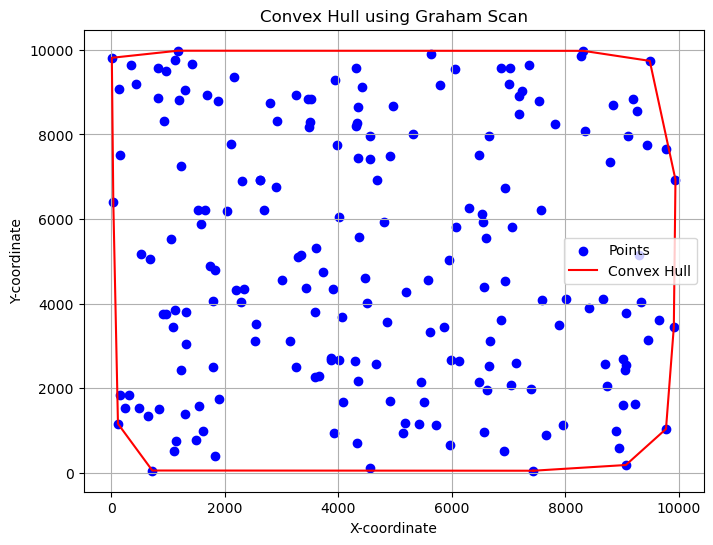

In [9]:
import matplotlib.pyplot as plt
import random

# Function to plot the convex hull and points
def plotConvexHull(points, convex_hull):
    plt.figure(figsize=(8, 6))
    
    # Draw all points
    x, y = zip(*points)
    plt.scatter(x, y, color='blue', label='Points')
    
    # Draw the convex hull
    hull_x, hull_y = zip(*convex_hull + [convex_hull[0]])  # To close the hull
    plt.plot(hull_x, hull_y, color='red', label='Convex Hull')
    
    plt.title('Convex Hull using Graham Scan')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.grid()
    plt.show()

# Generate 200 random 2D points in the range [0, 10000]
random.seed(42)  # For reproducibility
points = [(random.randint(0, 10000), random.randint(0, 10000)) for _ in range(200)]

# Calculate the convex hull using Graham Scan
convex_hull = grahamScan(points)
print("Convex Hull:", convex_hull)

# Plot the convex hull and points
plotConvexHull(points, convex_hull)